In [60]:
# Class name: AI1811
# Student code: HE181685
# Student name: Nguyễn Thành Trung
# Subject: CPV301-lAB1

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [9]:
dirl= "C:/Users/pagmas.saint/Downloads/lab1_kc_house_data.csv"

In [48]:
#Q1
df = pd.read_csv(dirl)
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [50]:
#Q2
df = df.drop('id', axis=1)
a = df.describe()
print(a)

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [52]:
#Q3
b = df['floors'].value_counts()
b.to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


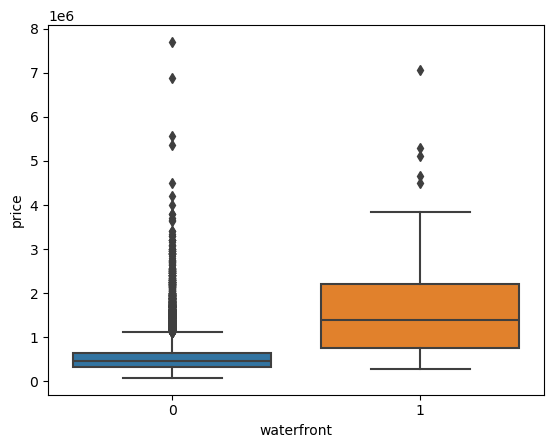

In [54]:
#Q4
c = sns.boxplot(x= 'waterfront', y= 'price', data=df)

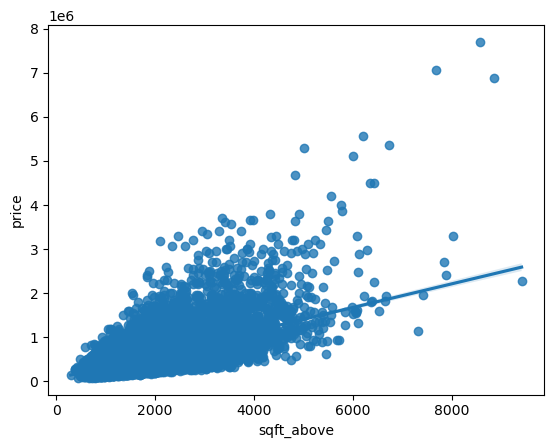

In [56]:
#Q5
d = sns.regplot(x='sqft_above', y='price', data=df)

In [21]:
#Q6
l = LinearRegression()

l.fit(df[['sqft_living']],df['price'])

print("R^2 =", l.score(df[['sqft_living']],df['price']))

R^2 = 0.4928532179037931


In [22]:
#Q7
features = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 
x = df[features]
y = df['price']
l.fit(x,y)
l.score(x,y)

0.6577151058279325

In [58]:
#Q8
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]


In [24]:
#Q9
pipe=Pipeline(Input)
pipe
pipe.fit(x,y)
pipe.score(x,y)

0.7513452602339394

In [25]:
#Q10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)
RM=Ridge(alpha=0.1)
RM.fit(x_train, y_train)
RM.score(x_test, y_test)

0.6480374087702241

In [26]:
#Q11
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RM=Ridge(alpha=0.1)
RM.fit(x_train_pr, y_train)
RM.score(x_test_pr, y_test)


0.7004432073040481